# 랜덤 포레스트(Random Forest)
---
**랜덤 포레스트**(Random Forest): 결정 트리의 앙상블, 여러 개의 (깊은) 결정 트리를 평균 내는 것

**랜덤 포레스트 알고리즘 단계**
1. $n$개의 랜덤한 부트스트랩 샘플을 뽑음(훈련 세트에서 중복을 허용하면서 랜덤하게 $n$개의 샘플을 선택)
2. 부트스트랩 샘플에서 결정 트리를 학습, 각 노드는 다음과 같음
- 중복을 허용하지 않고 랜덤하게 $d$개의 특성을 선택
- 정보 이득과 같은 목적 함수를 기준으로 최선의 분할을 만드는 특성을 사용해서 노드를 분할
3. 단계 1, 2를 $k$번 반복
4. 각 트리의 예측을 모아 <U>다수결 투표</U>로 클래스 레이블을 할당함

**장점**
- 하이퍼파라미터 튜닝에 많은 노력을 기울이지 않아도 됨

**하이퍼파라미터 최적화**
- 트리 개수($k$)
- 부트스트랩 샘플의 크기($n$)
- 각 분할에서 무작위로 선택할 특성 개수($d$)

# 다중 분류(Multiclass Classification) 실습
---
**데이터셋**: penguins.csv

**다중 분류**(Multiclass Classification)

**랜덤 포레스트**(Random Forest)

### 필요한 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import myutils as my

### 데이터 준비 & 전처리

In [ ]:
# !gdown https://raw.githubusercontent.com/devdio/datasets/main/penguins.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/datasets/main/penguins.csv
To: /content/penguins.csv
13.8kB [00:00, 18.0MB/s]       


In [ ]:
penguins = pd.read_csv('penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
# 결측치 확인
penguins.isna().sum(axis=0)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

<Axes: >

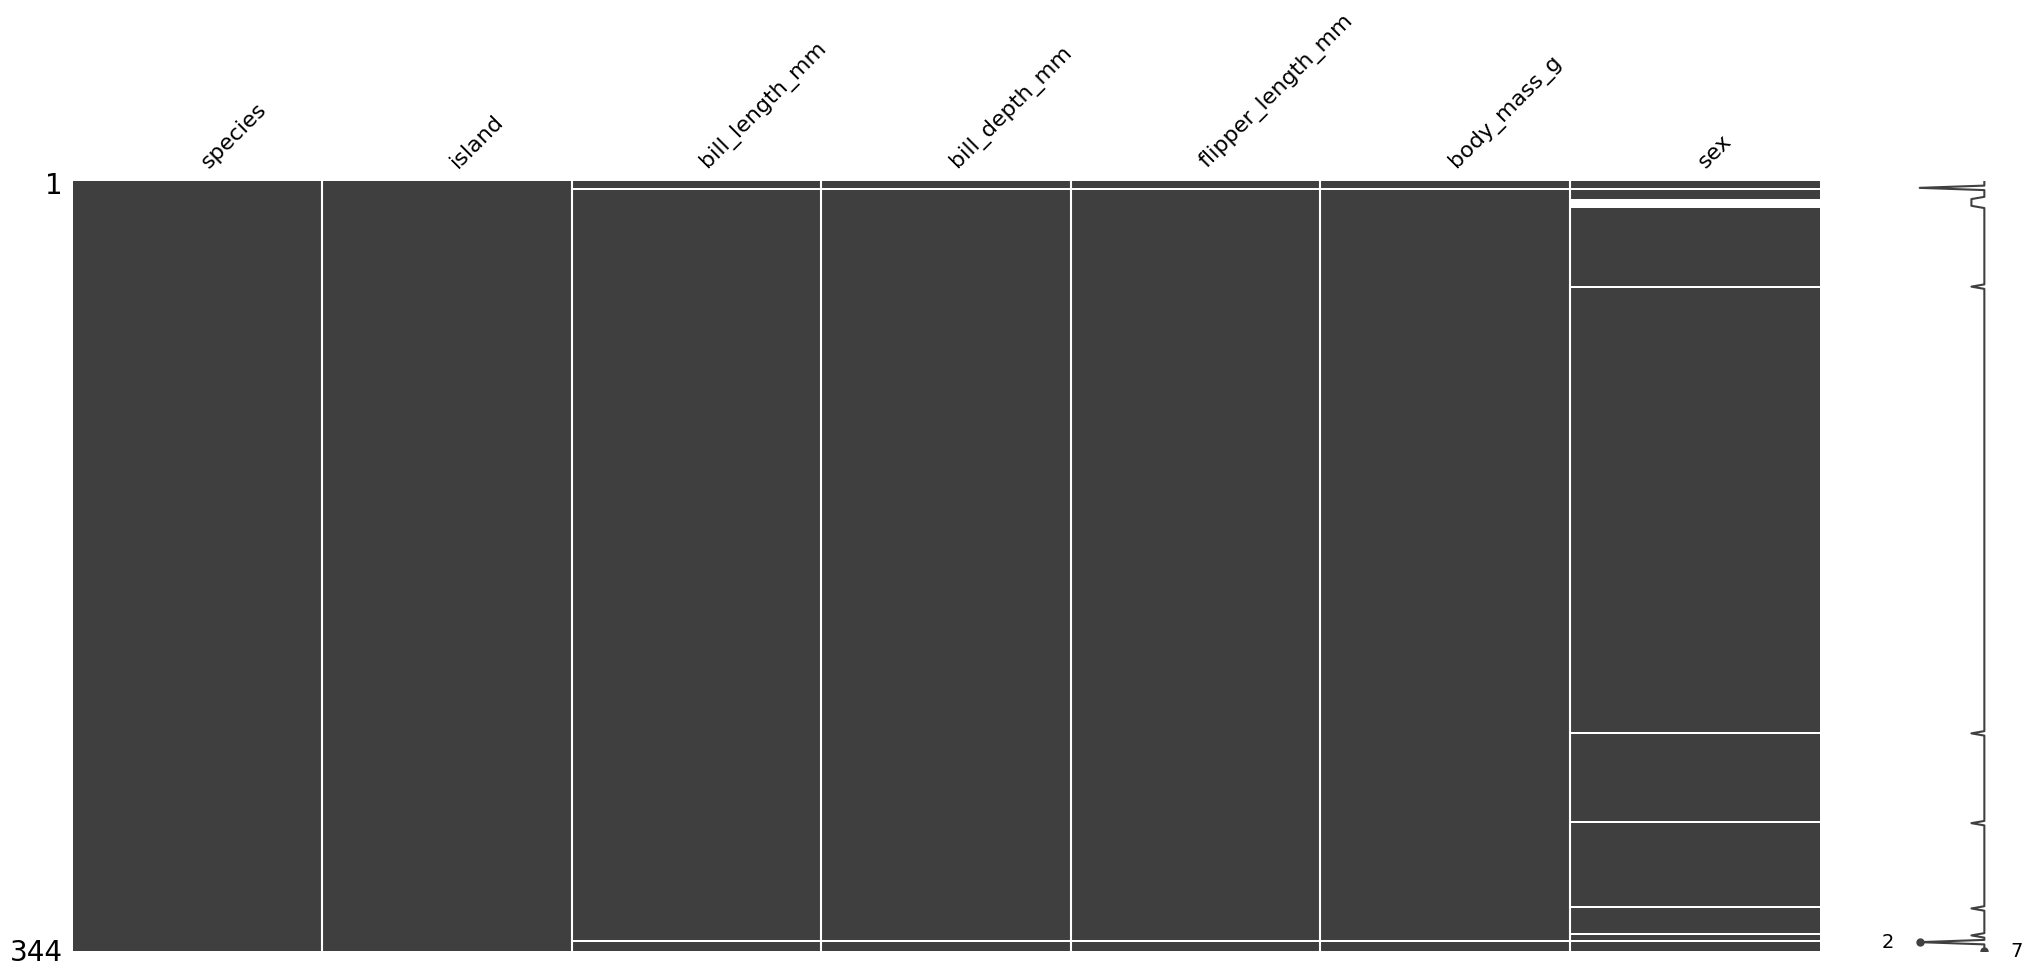

In [ ]:
import missingno as msno

msno.matrix(penguins)

In [ ]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
# 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g' 변수 결측치 제거
df = penguins.dropna(subset=['bill_length_mm'])
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


<Axes: >

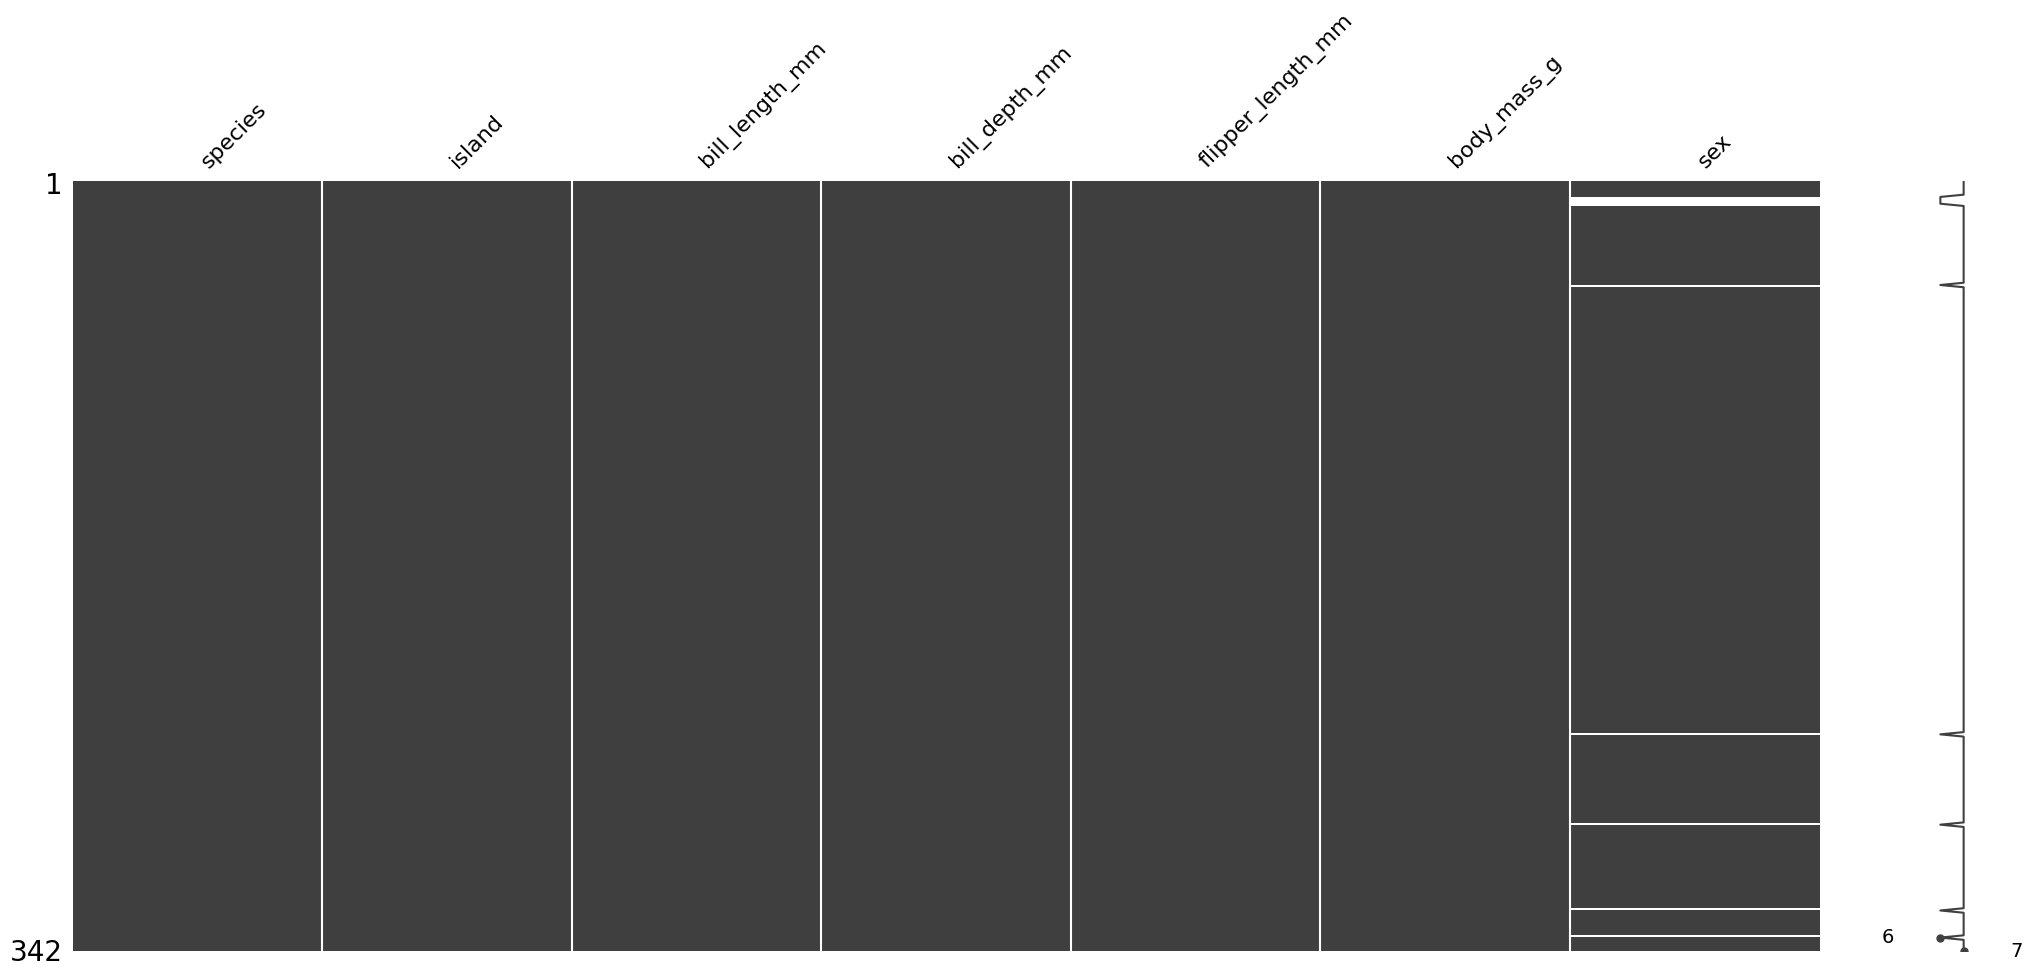

In [ ]:
msno.matrix(df)

In [ ]:
df['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [ ]:
df['sex'].isna().sum(axis=0)

9

In [ ]:
# sex 변수 결측치 채우기
df = df.copy() # SettingWithCopyWarning

df['sex'].fillna('NONE', inplace=True)

In [ ]:
df['sex'].value_counts()

MALE      168
FEMALE    165
NONE        9
Name: sex, dtype: int64

In [ ]:
# X, y 분리
X = df.drop(['species'], axis=1)
y = df['species']

In [ ]:
# island 변수 인코딩하기
X['island'] = X['island'].map({'Biscoe': 0, 'Dream': 1, 'Torgersen': 2})
# sex 변수 인코딩하기
X['sex'] = X['sex'].map({'FEMALE': 0, 'MALE': 1, 'NONE': 2})

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(273, 6) (69, 6)
(273,) (69,)


In [ ]:
type(X_train), type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

### 변수의 중요도 확인하기
---

In [ ]:
feature_name = X_train.columns
feature_name

Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
X_train = X_train.values
y_train = y_train.values

### 학습

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=30, max_depth=3)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=30)

### 평가

In [ ]:
clf.score(X_train, y_train)

0.9706959706959707

- **변수의 중요도**

In [ ]:
clf.feature_importances_

array([0.13216936, 0.32266732, 0.16147908, 0.27861594, 0.10289707,
       0.00217123])

In [ ]:
sr = pd.Series(clf.feature_importances_, index=feature_name)
sr

island               0.132169
bill_length_mm       0.322667
bill_depth_mm        0.161479
flipper_length_mm    0.278616
body_mass_g          0.102897
sex                  0.002171
dtype: float64

In [ ]:
sr = sr.sort_values(ascending=False)
sr

bill_length_mm       0.322667
flipper_length_mm    0.278616
bill_depth_mm        0.161479
island               0.132169
body_mass_g          0.102897
sex                  0.002171
dtype: float64

- **변수의 중요도 시각화**

<Axes: >

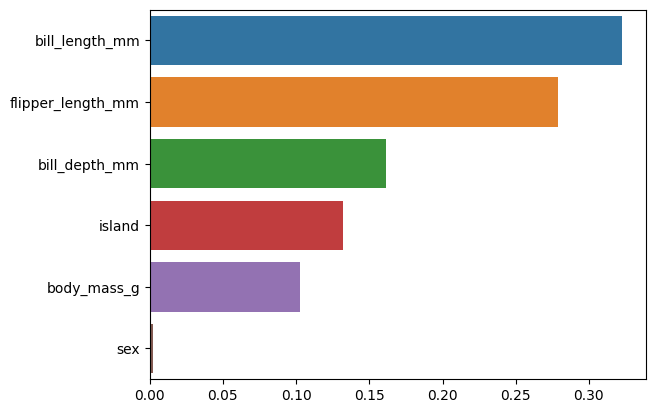

In [ ]:
sns.barplot(x=sr, y=sr.index)

### 예측

In [ ]:
X_test = X_test.values
y_test = y_test.values

In [ ]:
y_pred = clf.predict(X_test)
y_pred[:5]

array(['Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap'], dtype=object)

- **성능 평가**

In [ ]:
my.print_score(y_test, y_pred, average='macro')

accuracy: 0.9855072463768116
precision: 0.989247311827957
recall: 0.9761904761904763


- **혼동 행렬**(confusion matrix)

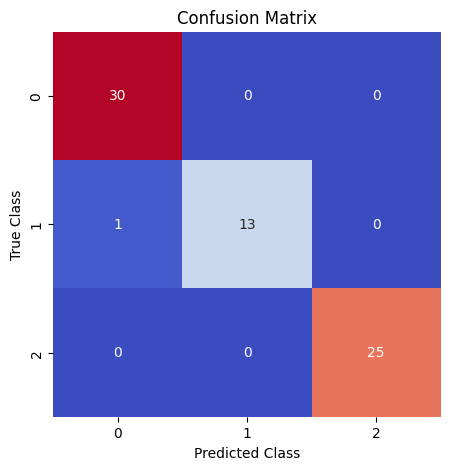

In [ ]:
my.plot_confusion_matrix(y_test, y_pred)